<a href="https://colab.research.google.com/github/KAMBLE/NLP/blob/main/BERT_HuggingFace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**BERT Sentiment Analysis using Tensorflow & huggingFace API**






##**1.   Text Preprocessing**

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

import re
from tensorflow.python.lib.io.tf_record import TFRecordWriter

In [ ]:
data = pd.read_csv('/content/stock_data.csv')#,encoding='latin1')

In [ ]:
#set column width to see full text 
pd.set_option('display.max_colwidth', -1)

In [ ]:
data['Text'][4980:4985]

4980    A surge of Saudi crude is expected to worsen a U.S. supply glut as drillers and refiners cut output and storage spaâ€¦ https://t.co/44Ndex9Qpz  
4981    RT @JChengWSJ: Coronavirus is making U.S.-China decoupling more likely, U.S. companies in China say, disrupting supply chains and strainingâ€¦  
4982    RT @kosakunarioka: Indiaâ€™s RBI Takes Additional Steps to Support Economy https://t.co/XKnJ8zW5yz via @WSJ                                     
4983    RT @joannechiuhk: Markets power ahead even as statistics showed Chinaâ€™s economy contracted 6.8% from a year earlier in the first quarter htâ€¦
4984    RT @JChengWSJ: @QiLiyan @TByGraceZhu Update: China's official first-quarter GDP was -6.8% from last year, the first decline since records bâ€¦  
Name: Text, dtype: object

In [ ]:
#declare text cleaning function
def clear_tags(text):
  return re.sub(r'@[A-Za-z0-9]+','',text)

def clear_links(text):
  return re.sub('https?://[A-Za-z0-9./]+','',text)

def clear_junk_char(text):
  return re.sub('[A-Za-z]+â€','',text)

def clear_full_stops(text):
  return re.sub(r'..+','',text) 

In [ ]:
data['Text'] = data['Text'].apply(clear_tags)
data['Text'] = data['Text'].apply(clear_links)
data['Text'] = data['Text'].apply(clear_junk_char)

#string = 'arkets power ahead even as statistics showed Chinaâ€™s economy contracted'
#re.sub('[A-Za-z]+â€','',string)
data['Text'] = data['Text'].str.replace('[RT:™s¦%;.-?/\n#~!^&*(),\_\-\+\$\']','')


In [ ]:
data['Text'].sample(n=10)

4740    MNX  Bullih pattern confirming break out mode Alo like here  NAN SCA GDO VMW PAY                               
1943    uer DOV weekly  Going higher   bot into cloe eod yet unit cot  ee we get a gapper today                        
4020    BAC accumulated more May  call today  ooking for a move to the upide leading into hurday                       
5141    Anwer to quetion from Wall Street Journal reader about how the temporary upenion of required minimum           
2722    AAP Apple VIX up today                                                                                         
162     he SmithCorona doing ok AMZN                                                                                   
64      trade idea buy WO  market  target  cut below                                                                   
4527    BAC Short Again Seem Weak a bit                                                                                
4938    KWK hi deal give Quickilver ampl

In [ ]:
# 1 is +ve sentiment 
# -1 is -ve sentiment
data['Sentiment'].value_counts()

 1    3685
-1    2106
Name: Sentiment, dtype: int64

In [ ]:
#convert -1 to 0 
data['Sentiment'][data['Sentiment']==-1] = 0

In [ ]:
data['Sentiment'].value_counts()

1    3685
0    2106
Name: Sentiment, dtype: int64

In [ ]:
data.shape

(5791, 2)

In [ ]:
#split the data into train, test and validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['Text'], data['Sentiment'], test_size=0.7, stratify=data['Sentiment'])
X_test, X_val, y_test, y_val = train_test_split(X_test,y_test, test_size=0.5)#, stratify=data['Sentiment'])

In [ ]:
train_data = pd.concat([X_train,y_train],axis=1)
test_data = pd.concat([X_test,y_test],axis=1)
val_data  = pd.concat([X_val,y_val],axis=1)

print(train_data.shape)
print(test_data.shape)
print(val_data.shape)

(1737, 2)
(2027, 2)
(2027, 2)


In [ ]:
print('train shape: ',train_data['Sentiment'].value_counts())
print('test  shape: ',test_data['Sentiment'].value_counts())
print('val shape: ', val_data['Sentiment'].value_counts())

train shape:  1    1105
0    632 
Name: Sentiment, dtype: int64
test  shape:  1    1273
0    754 
Name: Sentiment, dtype: int64
val shape:  1    1307
0    720 
Name: Sentiment, dtype: int64


In [ ]:
#for training -ve samples are only 632
# adding some random negative samples from test and validation data set 
random_neg_test_value = test_data[test_data['Sentiment'] == 0].sample(n=200)
random_neg_val_value  = val_data[val_data['Sentiment'] == 0].sample(n=200)

In [ ]:
train_data = pd.concat([train_data,random_neg_test_value,random_neg_val_value])

In [ ]:
train_data['Sentiment'].value_counts()

1    1105
0    1032
Name: Sentiment, dtype: int64

In [ ]:
val_data['Sentiment'].value_counts()

1    1307
0    720 
Name: Sentiment, dtype: int64

In [ ]:
test_data['Sentiment'].value_counts()

1    1273
0    754 
Name: Sentiment, dtype: int64

In [ ]:
test_data.head()

,Text,Sentiment
2159,Stop on AAP i hard top riking to make pt,1
4915,AAP China new will Catch Fire thi weekend jut watch,0
5702,Bank Shelve Fundraiing A Coronaviru Derail Market eport,0
2312,NEW POS AMZN I Still in the Grap of Corrective Force,0
2970,ed Daily riangle on DVAXNet Profit,0


In [ ]:
train_data.reset_index(inplace=True)
test_data.reset_index(inplace=True)
val_data.reset_index(inplace=True)

train_data.drop(columns=['index'],inplace=True)
test_data.drop(columns=['index'],inplace=True)
val_data.drop(columns=['index'],inplace=True)

In [ ]:
test_data.head()

,Text,Sentiment
0,Stop on AAP i hard top riking to make pt,1
1,AAP China new will Catch Fire thi weekend jut watch,0
2,Bank Shelve Fundraiing A Coronaviru Derail Market eport,0
3,NEW POS AMZN I Still in the Grap of Corrective Force,0
4,ed Daily riangle on DVAXNet Profit,0


In [ ]:
test_data.shape

(2027, 2)

In [ ]:
train_data.head()

,Text,Sentiment
0,KEX trying a hort filled and more at with a top,0
1,ed Daily riangle on JVAOpen ong at,1
2,EFC he bigger the bae,1
3,Green Weekly Monthly riangle on HBANpdating,0
4,HPQ i too much to ak for tomorrow,1


In [ ]:
test_data.dtypes

Text         object
Sentiment    int64 
dtype: object

##**2.Create Tensorflow Data Set**

In [ ]:
def create_tf_example(features, label,idx_value):
    tf_example = tf.train.Example(features=tf.train.Features(feature={
        'idx': tf.train.Feature(int64_list=tf.train.Int64List(value=[idx_value])),
        'sentence': tf.train.Feature(bytes_list=tf.train.BytesList(value=[features.encode('utf-8')])),
        #'sentence2': tf.train.Feature(bytes_list=tf.train.BytesList(value=[features.encode('utf-8')])),
        'label': tf.train.Feature(int64_list=tf.train.Int64List(value=[label]))
       
    }))

    return tf_example

In [ ]:
def convert_csv_to_tfrecord(data, file_name):
  writer = TFRecordWriter(file_name)
  for i in range(data.shape[0]):
    idx_value = i+1
    example = create_tf_example(data['Text'][i], data['Sentiment'][i],idx_value)
    writer.write(example.SerializeToString())
  writer.close()


In [ ]:
# convert data to tf records 
convert_csv_to_tfrecord(train_data, "/content/train_data.tfrecord")
convert_csv_to_tfrecord(test_data, "/content/test_data.tfrecord")
convert_csv_to_tfrecord(val_data, "/content/val_data.tfrecord")

In [ ]:
# read tf records
train_ds = tf.data.TFRecordDataset("/content/train_data.tfrecord") 
test_ds  = tf.data.TFRecordDataset("/content/test_data.tfrecord") 
val_ds  = tf.data.TFRecordDataset("/content/val_data.tfrecord")

In [ ]:
feature_spec = {
    'idx': tf.io.FixedLenFeature([], tf.int64),
    'sentence': tf.io.FixedLenFeature([], tf.string),
    #'sentence2': tf.io.FixedLenFeature([], tf.string),
    'label': tf.io.FixedLenFeature([], tf.int64)
}

In [ ]:
def parse_example(example_proto):
  # Parse the input tf.Example proto using the dictionary above.
  return tf.io.parse_single_example(example_proto, feature_spec)

In [ ]:
#parse data 
train_parse_ds = train_ds.map(parse_example)
test_parse_ds = test_ds.map(parse_example)
val_parse_ds = val_ds.map(parse_example)

In [ ]:
#check one train sample 
dataset_iterator = iter(train_parse_ds)
dataset_iterator.get_next()

{'idx': <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 'label': <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 'sentence': <tf.Tensor: shape=(), dtype=string, numpy=b'KEX trying a hort  filled and more at  with a  top'>}

In [ ]:
#check one test sample 
dataset_iterator = iter(test_parse_ds)
dataset_iterator.get_next()

{'idx': <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 'label': <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 'sentence': <tf.Tensor: shape=(), dtype=string, numpy=b'Stop on AAP i  hard top riking  to make  pt'>}

In [ ]:
#check one validation sample 
dataset_iterator = iter(val_parse_ds)
dataset_iterator.get_next()

{'idx': <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 'label': <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 'sentence': <tf.Tensor: shape=(), dtype=string, numpy=b'CS Cointar option trader buy  Feb call pread betting on good earning  '>}

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2027 entries, 0 to 2026
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       2027 non-null   object
 1   Sentiment  2027 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.8+ KB


##**3. Train Bert model**

In [ ]:
!pip install transformers

In [ ]:
# import HuggingFace Bert Sequence classification library and tokenizer
from transformers import (TFBertForSequenceClassification, 
                          BertTokenizer)

In [ ]:
#load pretrain model TFBertForSequenceClassification
bert_model = TFBertForSequenceClassification.from_pretrained("bert-base-cased")

Some weights of the model checkpoint at bert-base-cased were not used when initializing TFBertForSequenceClassification: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier', 'dropout_37']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
#load tokenizer 
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

In [ ]:
# this function will clean special character added while creating tfrecords
def clean_string(features):
    revised_sentence = tf.strings.regex_replace(features['sentence'], "\.\.\.", "", replace_global=True)
    revised_sentence = tf.strings.regex_replace(revised_sentence, "\\'", "'", replace_global=True)
    revised_sentence = tf.strings.regex_replace(revised_sentence, "\\n", "", replace_global=True)
    features['sentence'] = revised_sentence

    return features

In [ ]:
train_clean_ds = train_parse_ds.map(lambda features: clean_string(features))
test_clean_ds = test_parse_ds.map(lambda features: clean_string(features))
val_clean_ds = val_parse_ds.map(lambda features: clean_string(features))

In [ ]:
#data_clean_ds[0]
iter(train_clean_ds).get_next()

{'idx': <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 'label': <tf.Tensor: shape=(), dtype=int64, numpy=0>,
 'sentence': <tf.Tensor: shape=(), dtype=string, numpy=b'KEX trying a hort  filled and more at  with a  top'>}

In [ ]:
iter(test_clean_ds).get_next()

{'idx': <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 'label': <tf.Tensor: shape=(), dtype=int64, numpy=1>,
 'sentence': <tf.Tensor: shape=(), dtype=string, numpy=b'Stop on AAP i  hard top riking  to make  pt'>}

In [ ]:
#this glue function will convert tfrecord data to model suitable format 

from transformers import glue_convert_examples_to_features

bert_train_dataset = glue_convert_examples_to_features(examples = train_clean_ds, tokenizer = tokenizer, max_length = 128, task='sst-2',label_list =['1','0'])
bert_validation_dataset = glue_convert_examples_to_features(examples = val_clean_ds, tokenizer = tokenizer, max_length = 128, task='sst-2',label_list =['1','0'])


In [ ]:
# define model parameter 
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

bert_model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

In [ ]:
#decalre batch size 
BATCH_SIZE = 32

EVAL_BATCH_SIZE = BATCH_SIZE * 2

In [ ]:
train_steps = train_data.shape[0]//BATCH_SIZE
valid_steps = val_data.shape[0]//EVAL_BATCH_SIZE

In [ ]:
train_data.shape[0]//32

66

In [ ]:

bert_train_dataset = bert_train_dataset.shuffle(train_data.shape[0]).batch(BATCH_SIZE).repeat(-1)

bert_validation_dataset = bert_validation_dataset.batch(EVAL_BATCH_SIZE)

In [ ]:
#train model for 3 epochs 
history = bert_model.fit(bert_train_dataset, epochs=3, steps_per_epoch=train_steps,validation_data=bert_validation_dataset,validation_steps=valid_steps)


Epoch 1/3
66/66 [==============================] - 73s 1s/step - loss: 0.6716 - accuracy: 0.5819 - val_loss: 0.6091 - val_accuracy: 0.6704
Epoch 2/3
66/66 [==============================] - 76s 1s/step - loss: 0.5338 - accuracy: 0.7321 - val_loss: 0.4776 - val_accuracy: 0.7767
Epoch 3/3
66/66 [==============================] - 76s 1s/step - loss: 0.3172 - accuracy: 0.8789 - val_loss: 0.5011 - val_accuracy: 0.7702


In [ ]:
# print model summary
bert_model.summary()

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bert (TFBertMainLayer)       multiple                  108310272 
_________________________________________________________________
dropout_37 (Dropout)         multiple                  0         
_________________________________________________________________
classifier (Dense)           multiple                  1538      
Total params: 108,311,810
Trainable params: 108,311,810
Non-trainable params: 0
_________________________________________________________________


##**4. Save and Load Model**

In [ ]:
from transformers import BertConfig,BertModel

In [ ]:
# save model 
bert_model.save_pretrained('/content/senti_class') 

In [ ]:
#load model
load_model = TFBertForSequenceClassification.from_pretrained('/content/senti_class/')

Some weights of the model checkpoint at /content/senti_class/ were not used when initializing TFBertForSequenceClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of TFBertForSequenceClassification were not initialized from the model checkpoint at /content/senti_class/ and are newly initialized: ['dropout_75']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
load_model.summary()

Model: "tf_bert_for_sequence_classification_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bert (TFBertMainLayer)       multiple                  108310272 
_________________________________________________________________
dropout_75 (Dropout)         multiple                  0         
_________________________________________________________________
classifier (Dense)           multiple                  1538      
Total params: 108,311,810
Trainable params: 108,311,810
Non-trainable params: 0
_________________________________________________________________


##**5. Prediction on Test Data**

In [ ]:
#
pred_class_list = []
for txt in test_data['Text']:
  inputs = tokenizer(txt, return_tensors="tf")
  argmx_res = tf.nn.softmax(load_model(inputs))
  pred_class = tf.math.argmax(argmx_res[0][0],axis=0)
  pred_class_list.append(np.array([pred_class])[0])


In [ ]:
test_data['pred'] = pred_class_list

In [ ]:
test_data.head(10)

,Text,Sentiment,pred
0,AAP Sell ell ell,0,0
1,uer ANF triggering at the buy price Nice min candle Need to build on thi intraday momentum,1,1
2,in dec GE long in the IA under tock had plague now world love it tell me we headed down now jut a then knew we heading up,0,1
3,BI Governor Shaktikanta Da tart Pre Conference hi econd pre briefing ince the COVID outbreak,1,1
4,Maruti Suzuki March Sale Plunge Nearly Amid Coronaviru Outbreak,0,0
5,FOS bullih engulfing,1,0
6,NKD down day in lat going to wear off the overbought while giving back nothing amazing,1,0
7,Failure to complete the deal would be a blow to BP which already ha the highet debt level among the major oil,0,0
8,he Daily Shot US Crude Oil rading Below Near Year Low,0,0
9,MCP continue to print lower high and lower low down We hould ee a tet of the Feb low oon,0,0


### Visualize Result 

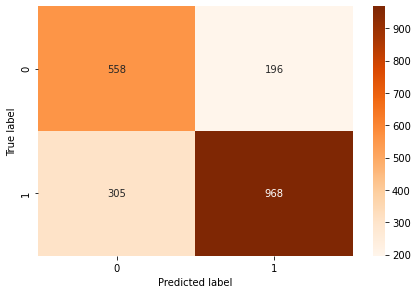

In [ ]:
%matplotlib inline  
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def visualize_confusion_matrix(y_pred_argmax, y_true):
    """

    :param y_pred_arg: This is an array with values that are 0 or 1
    :param y_true: This is an array with values that are 0 or 1
    :return:
    """

    cm = tf.math.confusion_matrix(y_true, y_pred_argmax).numpy()
    con_mat_df = pd.DataFrame(cm)

    sns.heatmap(con_mat_df, annot=True, fmt='g', cmap=plt.cm.Oranges)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


visualize_confusion_matrix(test_data['pred'], test_data['Sentiment'])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(test_data['Sentiment'], test_data['pred'], labels=[0,1]))

              precision    recall  f1-score   support

           0       0.65      0.74      0.69       754
           1       0.83      0.76      0.79      1273

    accuracy                           0.75      2027
   macro avg       0.74      0.75      0.74      2027
weighted avg       0.76      0.75      0.76      2027

